### AlexNet ARCHITECTURE

**IMPORT TOOLS AND LIBRARIES**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

**IMPORT DATASET**
+ CIFAR-10 dataset contain 60000 colored images.
+ with dimension of Each,` [32,32]`
+ Content of the Dataset is sampled to 10 Classes.
    + airplane
    + automobile
    + bird
    + cat
    + deer
    + dog
    + frog
    + horse
    + ship
    + truck
+ CIFAR-10 contains
    + 50000 training data
    + 10000 testing data.
+ And make the Validation Data.
+ After the preparation of the Validation Dataset.
+ the data must be represented in Tensorflow Dataset Representation.
+ use `tf.data.Dataset.from_tensor_slices()`

In [2]:
## import the dataset
print("=====================IMPORTING THE DATASET AND MAKING TRAINING AND TESTING SETS====================")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print("Training Images Dataset Shape :----",train_images.shape)
print("Training Labels Dataset Shape :----",train_labels.shape)
print("Testing Images Dataset Shape :----",test_images.shape)
print("Testing Labels Dataset Shape :----",test_labels.shape)

## defining the class names as a list
print("=====================DEFINING THE CLASS NAMES========================================================")
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("Class Names :--", class_names)

## defining the validation data
print("==========================DEFINING THE VALIDATION DATA====================================")
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]
print("Validation Images Dataset Shape :--", validation_images.shape)
print("Validation Labels Dataset Shape :--", validation_labels.shape)
print("Training Images Dataset Shape :----",train_images.shape)
print("Training Labels Dataset Shape :----",train_labels.shape)

print("============================PREPARING THE DATA TO TENSORFLOW DATASET REPRESENTATION====================")
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
print("Tensorflow Representation of training images and labels", len(train_ds))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
print("Tensorflow Representation of testing images and labels", len(test_ds))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
print("Tensorflow Representation of validation images and labels", len(validation_ds))

=====================IMPORTING THE DATASET AND MAKING TRAINING AND TESTING SETS====================
Training Images Dataset Shape :---- (50000, 32, 32, 3)
Training Labels Dataset Shape :---- (50000, 1)
Testing Images Dataset Shape :---- (10000, 32, 32, 3)
Testing Labels Dataset Shape :---- (10000, 1)
=====================DEFINING THE CLASS NAMES========================================================
Class Names :-- ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
==========================DEFINING THE VALIDATION DATA====================================
Validation Images Dataset Shape :-- (5000, 32, 32, 3)
Validation Labels Dataset Shape :-- (5000, 1)
Training Images Dataset Shape :---- (45000, 32, 32, 3)
Training Labels Dataset Shape :---- (45000, 1)
============================PREPARING THE DATA TO TENSORFLOW DATASET REPRESENTATION====================
Tensorflow Representation of training images and labels 45000
Tensorflow Representation of t

**PREPROCESSING**

+ Preprocessing means transformation of data from one form to another form.
+ Visualize the CIFAR-10 Dataset.

Primary Transformations are :--

    + Normalizing and Standardizing the Images.
    + Resizing the Images from 32x32 to 227x227
    + AlexNet Input Images are Expecting 227x227 Image.
    + For these tasks, we will create a function.

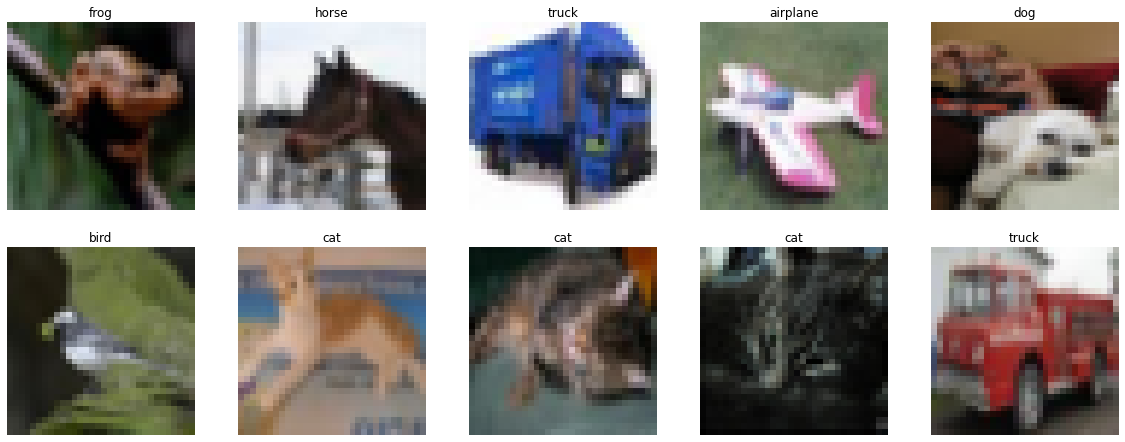

In [3]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(10)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

In [4]:
## function for nomalization and resizing the images.
def process_images(image, label):
    ## normalize the images to have a mean of 0 and standard deviation 1.
    image = tf.image.per_image_standardization(image)
    ## resize the images from 32x32 to 227x227
    image = tf.image.resize(image, (227,227))
    return image, label

**DATA / INPUT PIPELINE**

+ Building an Input Pipeline.
+ It is the Series of Functions or methods to call one after the other consecutively.
+ Input Pipelines are the Chain of functions that either act upon the data or enforces an operation through the Pipeline.
+ Lets get the Size of each dataset partition we created.
+ the size of the dataset s required to ensure that the dataset is thoroghly shuffled before passed through the Network.

For the Input Data Pipeline. We will do three Data Preprocessing steps.
   1. Preprocessing the Data within the Dataset.
   2. Shuffle the Dataset.
   3. Batch Data within the Dataset

In [5]:
## creating a fnuction for it
def size_of_dataset_partition(dataset):
    data_ds_size = tf.data.experimental.cardinality(dataset).numpy()
    return data_ds_size

train_ds_size = size_of_dataset_partition(train_ds)
test_ds_size = size_of_dataset_partition(test_ds)
validation_ds_size = size_of_dataset_partition(validation_ds)

print("Training Data Size :---", train_ds_size)
print("Testing Data Size :---", test_ds_size)
print("Validation Data Size :---", validation_ds_size)

Training Data Size :--- 45000
Testing Data Size :--- 10000
Validation Data Size :--- 5000


In [6]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [7]:
print(train_ds)
print(test_ds)
print(validation_ds)

<BatchDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>


**MODEL DEVELOPMENT**

In [9]:
model = keras.models.Sequential([
    ## first convolutional layer
    ## filters = 96
    ## kernel size = 11
    ## strides = 4
    ## activation = "relu"
    ## input size = (227,227,3)
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    ## batch normalization is used for dealing with unstable gradients.
    keras.layers.BatchNormalization(),
    ## maxpooling layer
    ## pool size = 3
    ## strides = 2
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    ## second convolutional layer
    ## filters = 256
    ## kernel size = 5
    ## strides = 1
    ## activation = "relu"
    ## padding "same" - zero padding
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    ## third convolutional layer
    ## filters = 384
    ## kernel size = 3
    ## strides = 1
    ## activation = "relu"
    ## padding "same" - zero padding
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    ## forth convolutional layer
    ## filters = 384
    ## kernel size = 3
    ## strides = 1
    ## activation = "relu"
    ## padding "same" - zero padding
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    ## fifth convolutional layer
    ## filters = 256
    ## kernel size = 3
    ## strides = 1
    ## activation = "relu"
    ## padding "same" - zero padding
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

## compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [10]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

**TRAINING THE MODEL**

In [11]:
# ## training the model
# model.fit(train_ds,
#           epochs=5,
#           validation_data=validation_ds,
#           validation_freq=1,
#           callbacks=[tensorboard_cb])

**EVALUATING THE MODEL**

In [12]:
# model.evaluate(test_ds)

This Custom Implemented AlexNet network that was trained, validated and evaluated on CIFAR-10 dataset to create a model with an Evaluation accuracy of 74% on the test dataset containing 5000 datapoints.

***